In [16]:
import tensorflow as tf
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [17]:
#3-a
def theta(t):
    return np.pi/6 + np.pi*(t**2)

def position(L, theta):
    return L*np.cos(theta), L*np.sin(theta)

In [18]:
t = np.linspace(0,2,100)
L = 0.5
p_val = position(L, theta(t))
np.array(p_val)

array([[ 0.4330127 ,  0.43269181,  0.43172486,  0.4300991 ,  0.42779334,
         0.4247782 ,  0.42101624,  0.41646239,  0.41106427,  0.4047627 ,
         0.39749235,  0.38918246,  0.37975766,  0.36913904,  0.35724531,
         0.34399414,  0.32930373,  0.31309452,  0.29529119,  0.27582481,
         0.2546352 ,  0.23167358,  0.20690536,  0.18031311,  0.15189972,
         0.1216917 ,  0.08974248,  0.05613581,  0.02098907, -0.01554359,
        -0.05326829, -0.09194889, -0.13130492, -0.17101007, -0.21069161,
        -0.2499306 , -0.2882633 , -0.32518384, -0.36014829, -0.39258032,
        -0.42187861, -0.44742605, -0.46860076, -0.48478905, -0.4954002 ,
        -0.49988297, -0.49774357, -0.48856491, -0.47202667, -0.44792569,
        -0.41619613, -0.37692863, -0.33038776, -0.27702675, -0.21749866,
        -0.152663  , -0.08358664, -0.01153834,  0.06202418,  0.13547533,
         0.20705125,  0.27488838,  0.33707071,  0.3916854 ,  0.43688572,
         0.47095987,  0.49240388,  0.49999599,  0.4

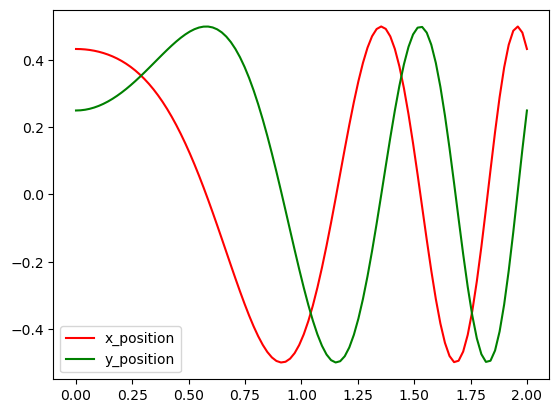

In [48]:
plt.plot(t, p_val[0],'r', label='x_position')
plt.plot(t, p_val[1],'g', label='y_position')
plt.legend()
plt.show()

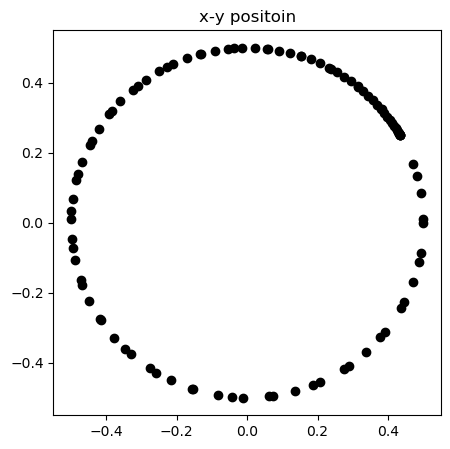

In [49]:
plt.figure(figsize=(5,5))
plt.plot(p_val[0], p_val[1],'ko')
plt.title('x-y positoin')
plt.show()

In [26]:
#3-b
L, t = sp.symbols('L, t')
omega = sp.tanh(t) + t
theta = sp.integrate(omega,t)
theta0 = np.pi/6
theta_const = -theta.subs(t,0) + theta0
theta += theta_const
theta

t**2/2 + t - log(tanh(t) + 1) + 0.523598775598299

In [27]:
position_sp = (L*sp.cos(theta), L*sp.sin(theta))
position_sp

(L*cos(t**2/2 + t - log(tanh(t) + 1) + 0.523598775598299),
 L*sin(t**2/2 + t - log(tanh(t) + 1) + 0.523598775598299))

In [29]:
t_val = np.linspace(0,2,100)
pos_val = []
for pos in position_sp:
    pos_val_dummy = []
    for t_unit in t_val:
        pos_val_dummy.append(pos.subs([(L,0.5), (t, t_unit)]))
    pos_val.append(pos_val_dummy)
np.array(pos_val)

array([[0.433012701892219, 0.432910638900131, 0.432604059115095,
        0.432091791877320, 0.431371891974531, 0.430441648469442,
        0.429297597050891, 0.427935535901130, 0.426350545069285,
        0.424537009338282, 0.422488644569628, 0.420198527507092,
        0.417659129016694, 0.414862350736372, 0.411799565104138,
        0.408461658728598, 0.404839079060158, 0.400921884315221,
        0.396699796599037, 0.392162258165648, 0.387298490745526,
        0.382097557863023, 0.376548430056605, 0.370640052905032,
        0.364361417752166, 0.357701635011914, 0.350650009922935,
        0.343196120610202, 0.335329898297272, 0.327041709499187,
        0.318322440011375, 0.309163580494674, 0.299557313440792,
        0.289496601286049, 0.278975275424299, 0.267988125852417,
        0.256530991163794, 0.244600848586953, 0.232195903747700,
        0.219315679814350, 0.205961105666445, 0.192134602708273,
        0.177840169929402, 0.163083466795502, 0.147871893534133,
        0.132214668361961

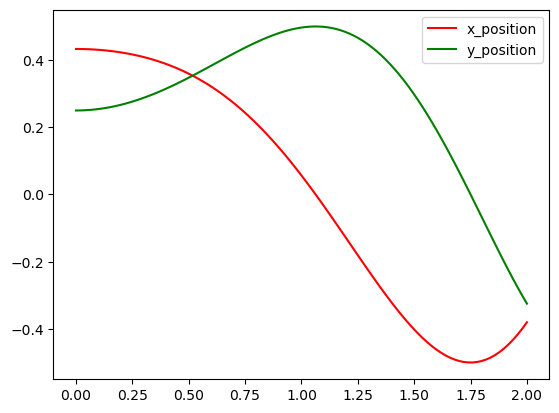

In [50]:
plt.plot(t_val, pos_val[0],'r', label='x_position')
plt.plot(t_val, pos_val[1],'g', label='y_position')
plt.legend()
plt.show()

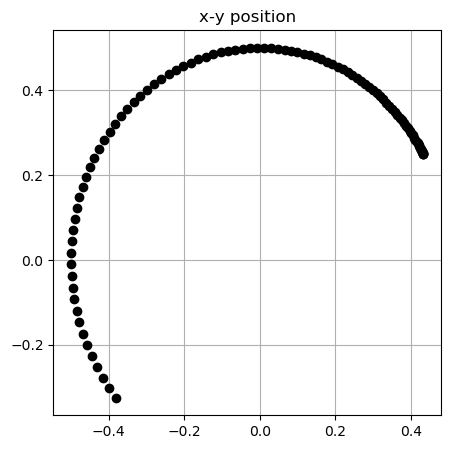

In [51]:
plt.figure(figsize=(5,5))
plt.plot(pos_val[0], pos_val[1], 'ko')
plt.grid(True)
plt.title('x-y position')
plt.show()

In [33]:
#3-c
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [34]:
optimizer = tf.keras.optimizers.Adam(1e-2)

In [39]:
def loss_fn(y_true, y_pred):
    loss = tf.math.square(y_true - y_pred)
    return tf.math.reduce_mean(loss)

In [36]:
def omega(model, t):
    with tf.GradientTape() as tape:
        t_tf = tf.constant(t)
        tape.watch(t_tf)
        theta = model(t_tf)
    omega_cal = tape.gradient(theta, t_tf)
    del tape
    return omega_cal

In [37]:
t = np.linspace(0,2,100)

In [41]:
epochs = 1000
for num_epoch in range(epochs):
    with tf.GradientTape() as tape:
        omega_cal = omega(model, t)
        loss1 = loss_fn(np.pi, omega_cal)
        loss2 = loss_fn(np.pi/6, model(tf.constant([0.])))
        loss = tf.cast(loss1, dtype='float32') + loss2
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    print('Epoch %s : Loss %.4f' % (num_epoch, loss.numpy()))

Epoch 0 : Loss 6.8303
Epoch 1 : Loss 6.5579
Epoch 2 : Loss 6.2788
Epoch 3 : Loss 5.9935
Epoch 4 : Loss 5.7026
Epoch 5 : Loss 5.4068
Epoch 6 : Loss 5.1069
Epoch 7 : Loss 4.8036
Epoch 8 : Loss 4.4979
Epoch 9 : Loss 4.1908
Epoch 10 : Loss 3.8834
Epoch 11 : Loss 3.5769
Epoch 12 : Loss 3.2726
Epoch 13 : Loss 2.9720
Epoch 14 : Loss 2.6765
Epoch 15 : Loss 2.3925
Epoch 16 : Loss 2.1185
Epoch 17 : Loss 1.8544
Epoch 18 : Loss 1.6022
Epoch 19 : Loss 1.3641
Epoch 20 : Loss 1.1425
Epoch 21 : Loss 0.9395
Epoch 22 : Loss 0.7573
Epoch 23 : Loss 0.5977
Epoch 24 : Loss 0.4625
Epoch 25 : Loss 0.3526
Epoch 26 : Loss 0.2685
Epoch 27 : Loss 0.2098
Epoch 28 : Loss 0.1750
Epoch 29 : Loss 0.1617
Epoch 30 : Loss 0.1665
Epoch 31 : Loss 0.1850
Epoch 32 : Loss 0.2125
Epoch 33 : Loss 0.2437
Epoch 34 : Loss 0.2741
Epoch 35 : Loss 0.2995
Epoch 36 : Loss 0.3171
Epoch 37 : Loss 0.3254
Epoch 38 : Loss 0.3238
Epoch 39 : Loss 0.3134
Epoch 40 : Loss 0.2955
Epoch 41 : Loss 0.2724
Epoch 42 : Loss 0.2462
Epoch 43 : Loss 0.219

4/4 [==============================] - 0s 1ms/step


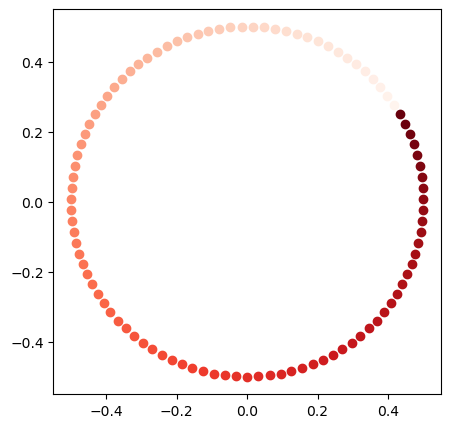

In [43]:
from matplotlib.pyplot import cm
color = cm.Reds(np.linspace(0,1,100))
theta = model.predict(t)
plt.figure(figsize=(5,5))
for x, y, c in zip(0.5*np.cos(theta), 0.5*np.sin(theta), color):
    plt.scatter(x,y,color=c)

In [44]:
t = np.linspace(0,2,100)
omega_measured = np.pi + 0.01*np.random.normal(size=(100,))

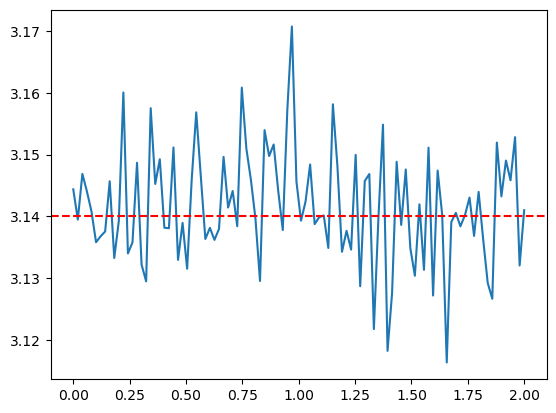

In [47]:
plt.plot(t, omega_measured)
plt.axhline(y = 3.14, color='r', linestyle='--')
plt.show()